# Schwarshild coordinates Einstein Tensor calculations using Symbolic module
## The nonlocal breather

In [44]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

### Make time tick regular, waves get longer - example cos w (t - r/y*r/c) or similar, y is the length



![alt-text](img/schwarschild.png "Schwarschild coords")


In [45]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v, R0 = sympy.symbols("G M F a w v R0")
v = 1
a = M*(1 - F*sin(w*(syms[0] - R0*ln(syms[1])/v)))

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -mT*mT/(v*v*mR*mR)/(1 - 2*a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



-F*M*w*cos(w*(-R0*log(r) + t))
F*M*R0*w*cos(w*(-R0*log(r) + t))/r


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                        2                                                                                   ⎤
⎢                      -r                                                                                    ⎥
⎢────────────────────────────────────────────────                      0                       0       0     ⎥
⎢  2 ⎛  2⋅M⋅(-F⋅sin(w⋅(-R₀⋅log(r) + t)) + 1)    ⎞                                                            ⎥
⎢R₀ ⋅⎜- ──────────────────────────────────── + 1⎟                                                            ⎥
⎢    ⎝                   r                      ⎠                                                            ⎥
⎢                                                                                                            ⎥
⎢                                                                      1                                     ⎥
⎢                       0                          ──────────────────────────────────────────  0       0     ⎥
⎢

### Calculating the Einstein Tensor (with both indices covariant)

In [46]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡          2.0⋅F⋅M⋅w⋅cos(w⋅(R₀⋅log(r) - t))                                       2⋅F⋅M⋅w⋅cos(w⋅(R₀⋅log(r) - t))                      
⎢────────────────────────────────────────────────────                       ──────────────────────────────────────────                
⎢R₀⋅(-2.0⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) - 2.0⋅M + 1.0⋅r)                       r⋅(2⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) + 2⋅M - r)                
⎢                                                                                                                                     
⎢           2⋅F⋅M⋅w⋅cos(w⋅(R₀⋅log(r) - t))             2.0⋅F⋅M⋅R₀⋅w⋅cos(w⋅(R₀⋅log(r) - t)) - 8.0⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) - 8.0⋅M + 
⎢     ──────────────────────────────────────────       ───────────────────────────────────────────────────────────────────────────────
⎢     r⋅(2⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) + 2⋅M - r)                        2                                                             
⎢                                                      

In [47]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡M⋅r⋅(-2⋅F⋅R₀⋅w⋅cos(w⋅(R₀⋅log(r) - t)) + F⋅sin(w⋅(R₀⋅log(r) - t)) + 1) + 2⋅(2⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) + 2⋅M - r)⋅(-F⋅M⋅R₀⋅w⋅cos(w⋅(
⎢─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                          2                                          2               
⎢                                                                        R₀ ⋅(-2⋅F⋅M⋅sin(w⋅(R₀⋅log(r) - t)) - 2⋅M + r)                
⎢                                                                                                                                     
⎢                                                                                2⋅F⋅M⋅w⋅cos(w⋅(R₀⋅log(r) - t))                       
⎢                                                                          ──────────────────────────────────────────                 
⎢                                                      

(t, r, theta, phi, F, M, R0, w)


Text(0.5, 1.0, 'Einstien Tensor, G')

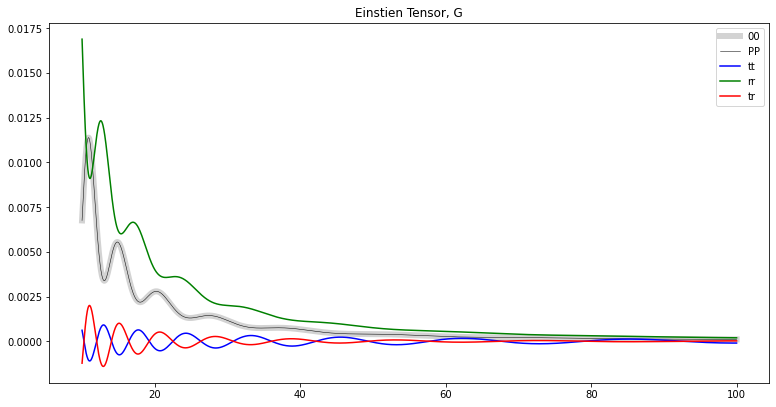

In [91]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

v = 200.05

theta = 1
R0 = 20.0
F = 0.1


#Make x values - which we will sub in for r 
x = np.arange(10.0, 100.0, 0.04)

# Call the functions
tt = func(1.0,x,theta, 1, F, 1, R0, 1)[0][0]

tr = func(1.0,x,theta, 1, F, 1, R0, 1)[0][1]

rr = func(1.0,x,theta, 1, F, 1, R0, 1)[1][1] 

hh = func(1.0,x,theta, 1, F, 1, R0, 1)[2][2]/(x*x)

pp = func(1.0,x,theta, 1, F, 1, R0, 1)[3][3]/(x*x*sin(theta)*sin(theta))


fig=plt.figure(figsize=(10, 5))
ax=fig.add_axes([0,2,1.0,1.0])

ax.plot(x,hh, "lightgrey",label="00", linewidth=6.0)
ax.plot(x,pp, "black",label="PP", linewidth=0.5)

ax.plot(x,tt, "-b", label="tt")
ax.plot(x,rr, "-g", label="rr")
ax.plot(x,tr, "-r", label="tr")

ax.legend(loc="upper right")
ax.set_title("Einstien Tensor, G")


#NOT Zero 


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

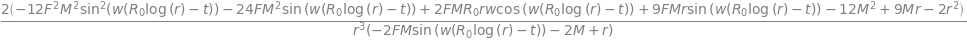

In [92]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


(t, r, theta, phi, F, M, R0, w)


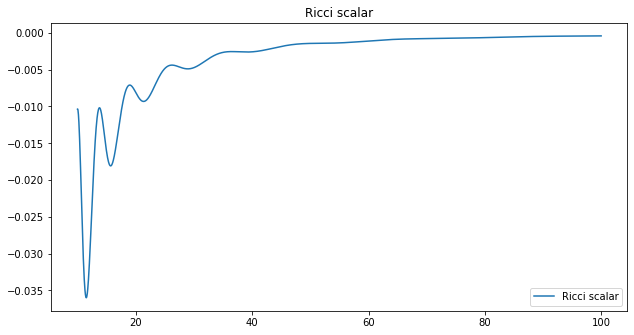

In [93]:
#plot the Ricci scalar

args, funcR = R.tensor_lambdify()
print(args) # these are the argument values 

v = 200.05

theta = 1
R0 = 20.0
F = 0.2


#Make x values - which we will sub in for r 
x = np.arange(10.0, 100.0, 0.04)

# Call the functions
ricci = funcR(2.0,x,theta, 1, F, 1, R0, 1)


fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,ricci, label="Ricci scalar")


ax.set_title("Ricci scalar")

ax.legend(loc="lower right")





In [51]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.

⎡                                                                                                                                     
⎢                                                      ⎡0                                    0                                        
⎢                                                      ⎢                                                                              
⎢                                                      ⎢      2                                                                       
⎢                                                      ⎢   M⋅r ⋅(2⋅F⋅R₀⋅w⋅cos(w⋅(R₀⋅log(r) - t)) - F⋅sin(w⋅(R₀⋅log(r) - t)) - 1)      
⎢                                                      ⎢0  ─────────────────────────────────────────────────────────────────────      
⎢                                                      ⎢                 2                                          3                 
⎢                                                      

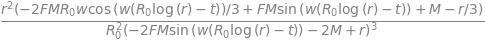

In [52]:
weyl[0,1,0,1]

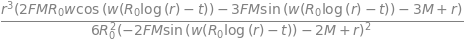

In [53]:
weyl[0,2,0,2]

(t, r, theta, phi, F, M, R0, w)


Text(0.5, 1.0, 'Weyl tensor')

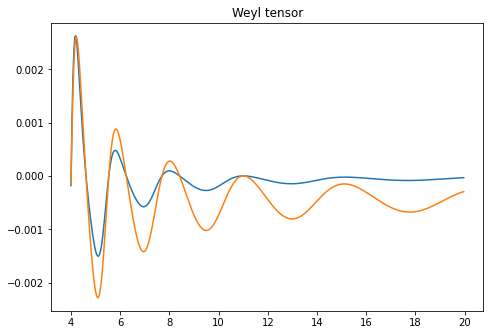

In [61]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

theta = 1

phi = 1

R0 = 20.0
F = 0.2
w = 1



#Make x values - which we will sub in for r 
x = np.arange(4, 20.0, 0.04)

# Call the functions
y = func(1.0,x,theta, phi, F, 1, R0, w)[0][1][0][1]/x
z = -func(1.0,x,theta, phi, F, 1, R0, w)[0][2][0][2]/(x*x) # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("Weyl tensor")


